# Dry Beans Classification

- Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both marketing and production to provide the principles of sustainable agricultural systems.

- In this notbook we try different algorithms to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira, depending **ONLY** on dimension and shape features of bean varieties with no external discriminatory features.

### Data fields

- ID: An ID for this instance
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4* pi * A)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1): L/d
- ShapeFactor2 (SF2): l/d
- ShapeFactor3 (SF3): 4A/(L^2 * pi)
- ShapeFactor4 (SF4): 4A/(L* l * pi)
- y: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

## Install required packages

In [145]:
#!pip install imbalanced-learn
#!pip install featurewiz
#!pip install plotnine
#!pip install catboost

  Using cached catboost-1.2.tar.gz (95.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-39
      creating build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/plot_helpers.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/metrics.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/version.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/text_processing.py -

## Importing libraries

In [144]:
import pandas as pd
import os
import datetime
import calendar
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import r2_score,mean_squared_error
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.utils import class_weight
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import skew
import xgboost as xgb



warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Reading the dataset

In [98]:
df = pd.read_csv('dataset/train_dry.csv',index_col='ID')

In [99]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI


- There are 10834 rows and and a total of 16 features.

In [100]:
np.shape(df)

(10834, 17)

In [101]:
df['y'].unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

- There are 7 unique target classes 

### Get Data Summary

In [102]:
df.describe(percentiles=[.25, .5, .75, 0.995]).T

,count,mean,std,min,25%,50%,75%,99.5%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,200705.420000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1716.551280,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,653.014248,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,400.636925,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.248644,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.895673,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,203320.565000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,505.515655,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.830903,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.993309,0.994677


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(14), i

- No missing values in the training dataset but we have to take into consideration if any missing data may appear in the test set.

### Checking for duplicates

In [104]:
df.duplicated(subset=None, keep='first').sum()

0

- No duplicate records

## EDA

**1- Count and distribution of all beans categories:**

In [105]:
# Count of each bean category
bean_counts = df['y'].value_counts()

# Display the count
print("Count of each bean category:")
print(bean_counts)

Count of each bean category:
y
DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: count, dtype: int64


- We can notice that there is a slight imbalance in the data we need to handle.

**2- Distribution of numerical features:**

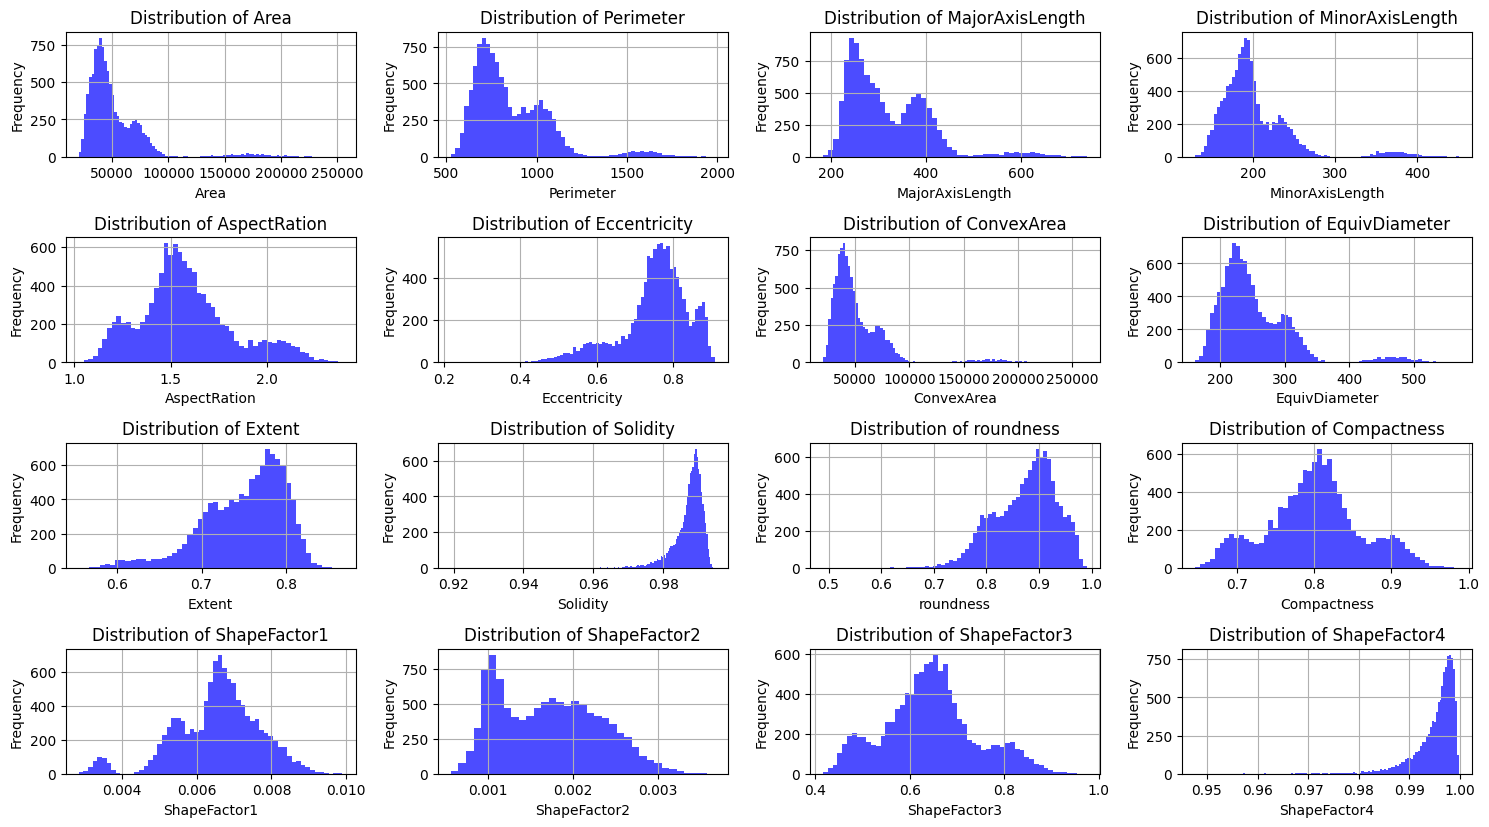

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is called 'df'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for the subplot grid
num_rows = int(len(numerical_columns) / 4) + 1
num_cols = 4

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column], bins='auto', color='blue', alpha=0.7)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].grid(True)

# Hide empty subplots
if len(numerical_columns) < num_rows * num_cols:
    for j in range(len(numerical_columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



- Some distributions have long tails and most are **bi-modal** which means that some bean classes should be quite distinct from others. 

**3- Boxplot of numerical features for each type of bean:**

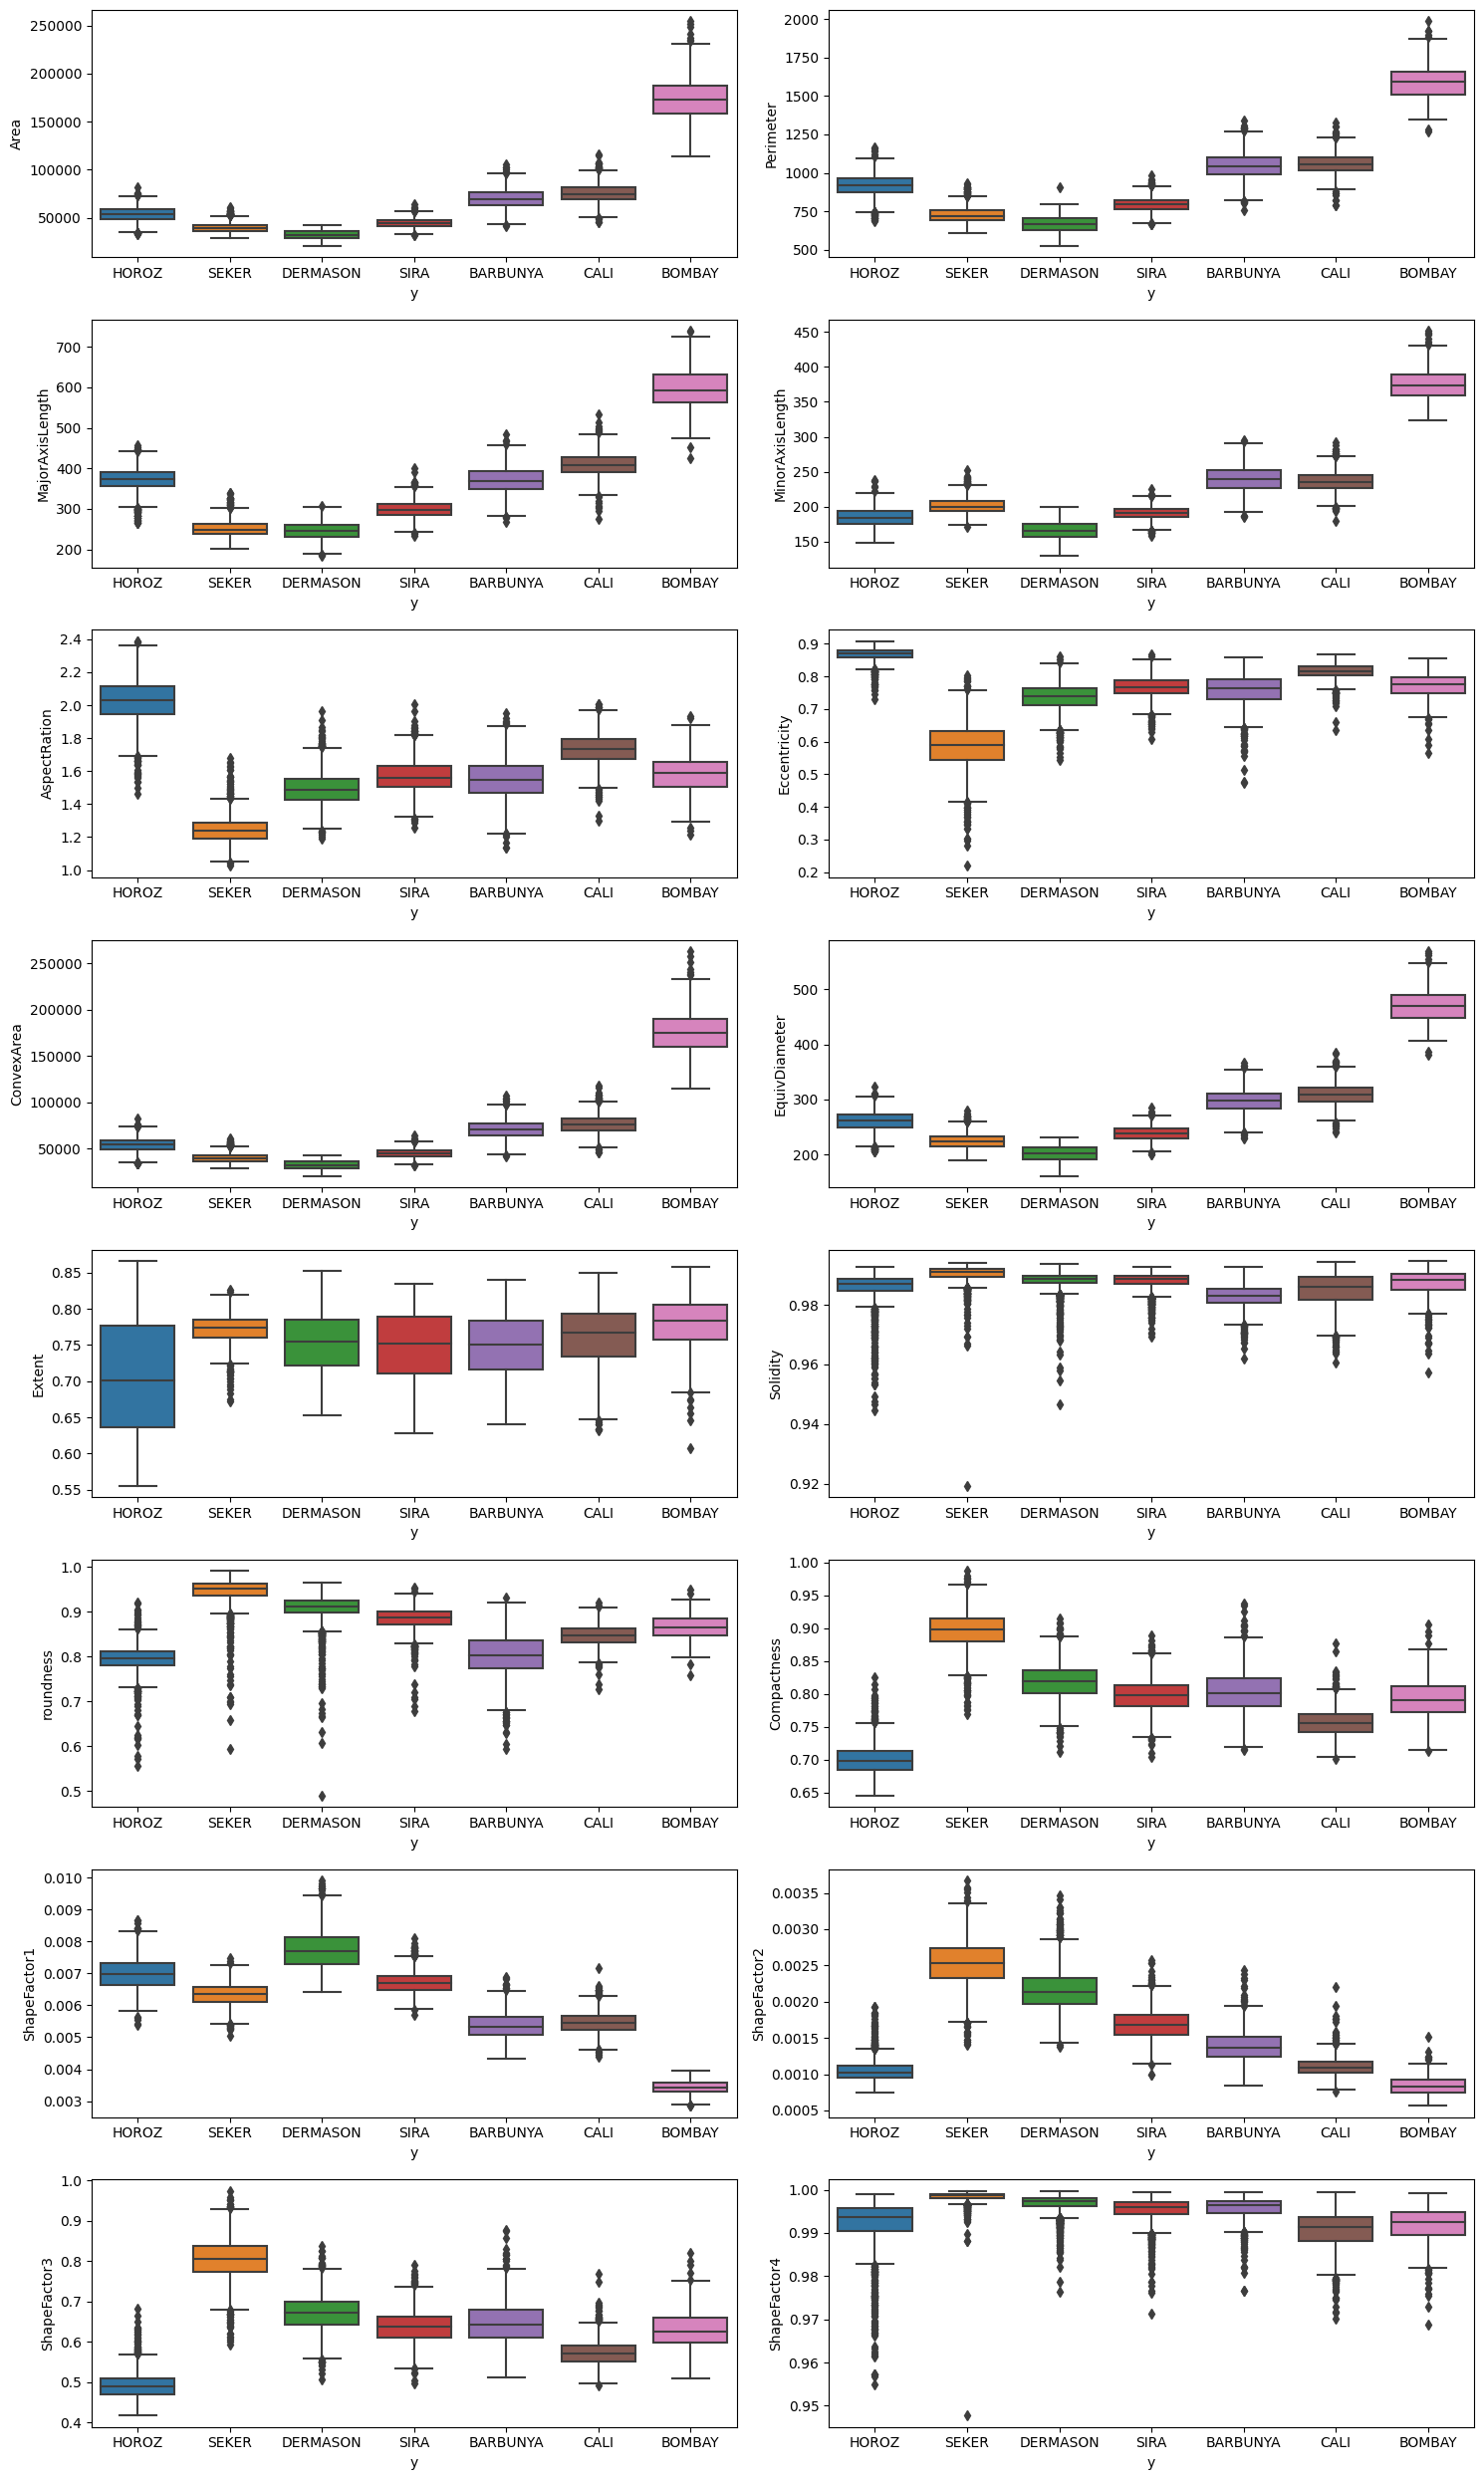

In [107]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['y'], y= df[variable], ax=subplot)
plt.tight_layout()

- We can notice that the "Bombay" & "Horoz" classes are distinct from other classes.

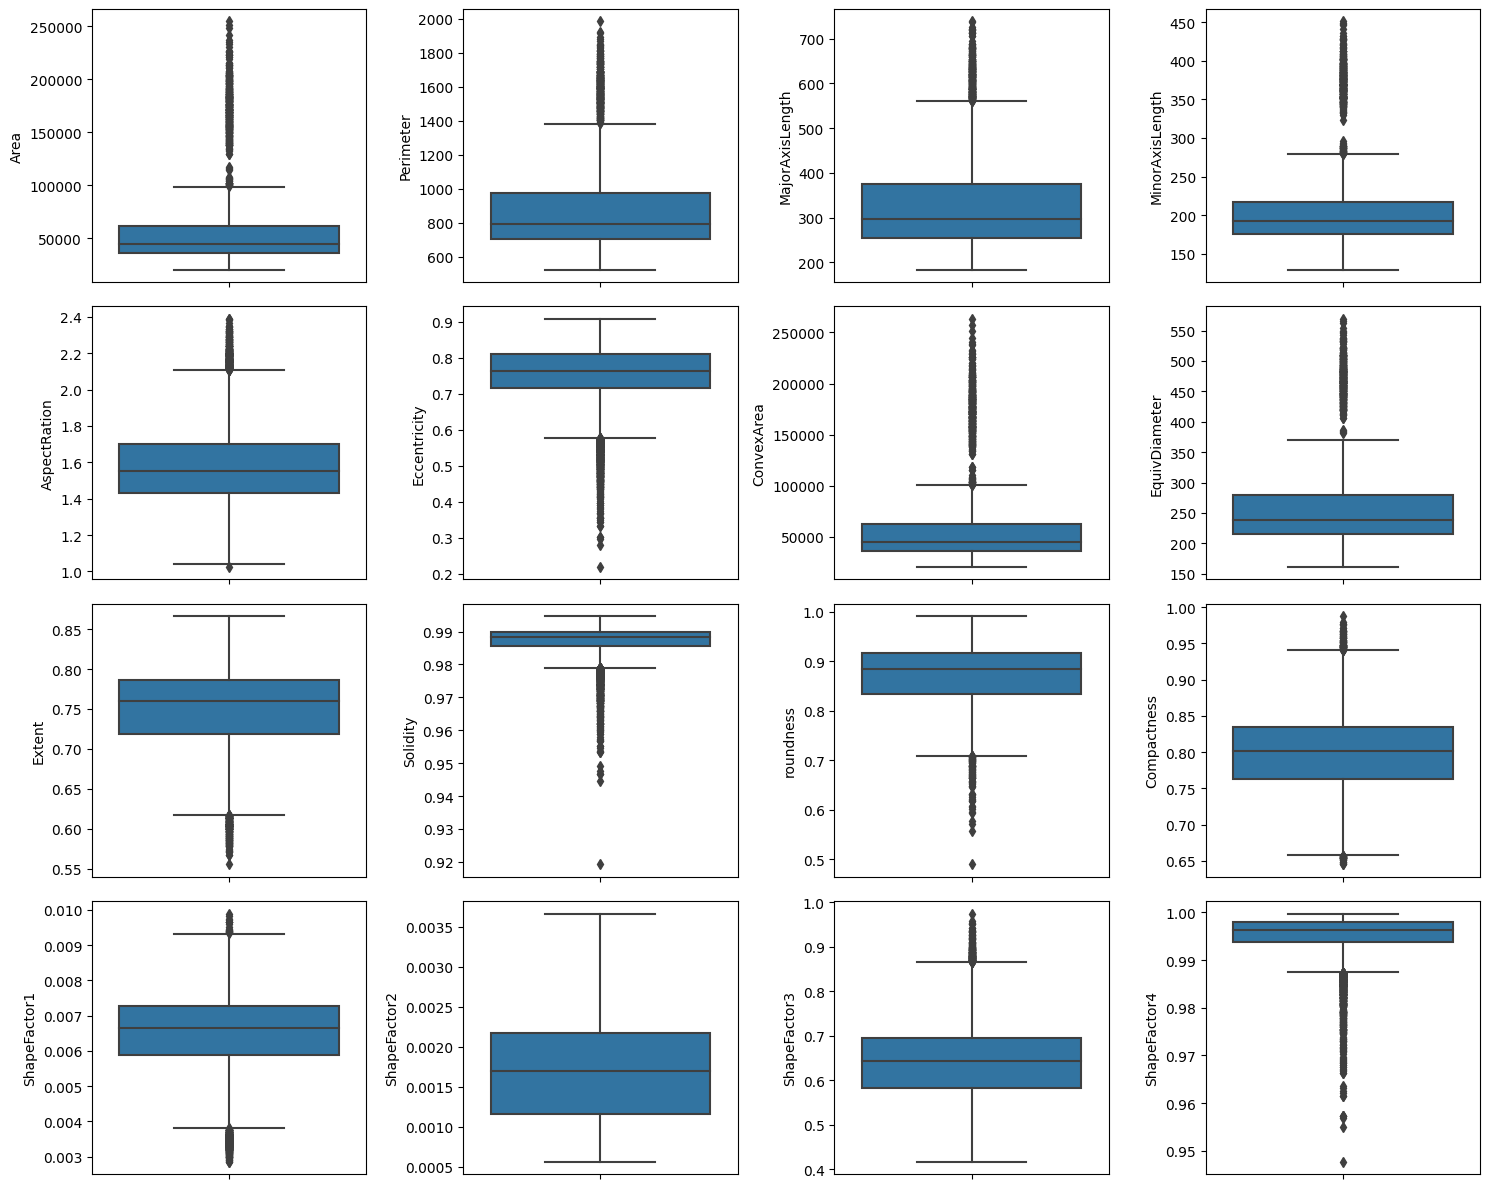

In [108]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

**4- Pearson linear correlation**

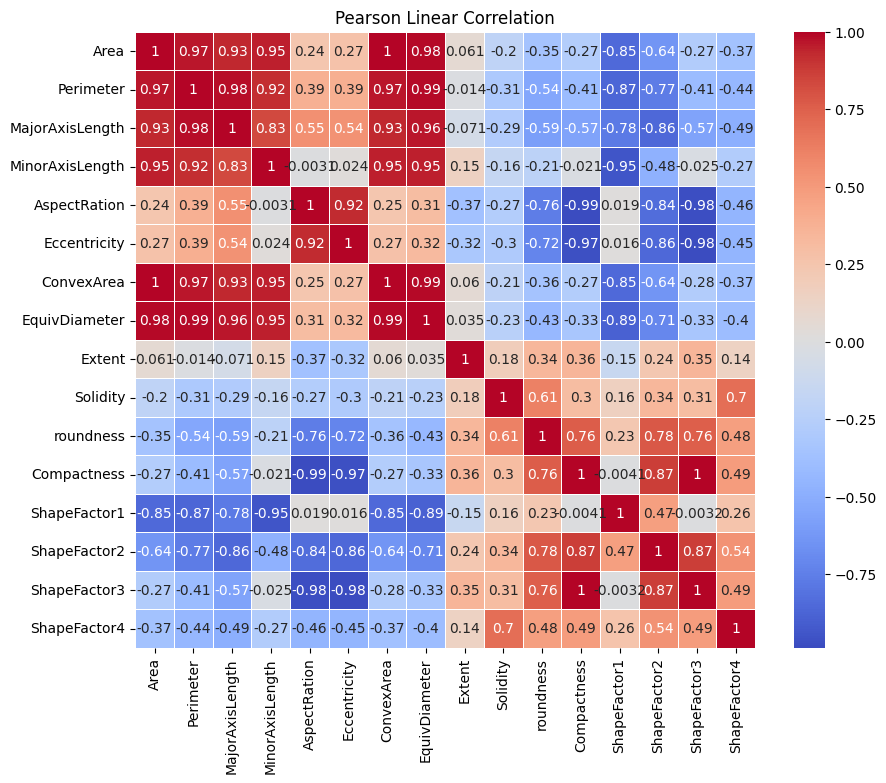

In [109]:

numerical_columns = df.select_dtypes(include=['int64', 'float64'])


# Calculate the Pearson correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Linear Correlation')
plt.show()

- There are lots of highly correlated features and to examine this multicollinearity more, we will look at the pairwise scatter plots.

**5 - Variables Scatter Pairplots**

## Adding new features

In [110]:
df['Bounding_rectangular_area'] = df['Area']/df['Extent']

## Label Encoding target column 

In [111]:
le = preprocessing.LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [112]:
df['y'].unique()

array([4, 5, 3, 6, 0, 2, 1])

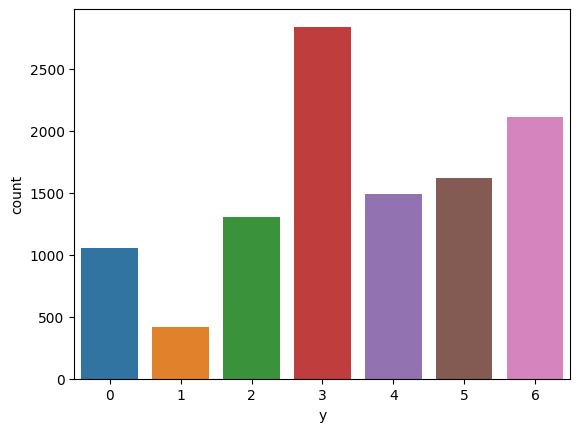

In [113]:
_ = sns.countplot(x='y', data=df)

## Train Validation split
- We are going to split the data into train and validation sets prior to any normalization or feature scaling, work with the train-splitted set separately and then apply its normalization parameters on the validation and test sets.

In [114]:
features = df.drop(columns=['y']).columns
train_df, val_df = train_test_split(df, test_size=0.05, random_state=42, stratify = df['y'])

- **Removing Outliers in some features in the training set within certain threshold**

In [115]:
train_df = train_df[train_df['Eccentricity'] >= 0.25]
train_df = train_df[train_df['Solidity'] >= 0.94]
train_df = train_df[train_df['roundness'] >= 0.53]
train_df = train_df[train_df['ShapeFactor4'] >= 0.96]

In [116]:
X_train = train_df[features]
y_train = train_df['y']

X_val = val_df[features]
y_val = val_df['y']

## Feature Scaling

In [117]:
cols = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','roundness','AspectRation','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity','Bounding_rectangular_area']

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_val_scaled = sc.transform(X_val[cols])
X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)

/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_38928/3706888135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)
/var/folders/wj/_0sxv10d2yv0s5t24sjf71680000gn/T/ipykernel_38928/3706888135.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)


In [118]:
X_train = X_train.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRation'])
X_val = X_val.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRation'])

# Model Implementation

# Logistic Regression

Train F1_Score:  0.9237650719564373


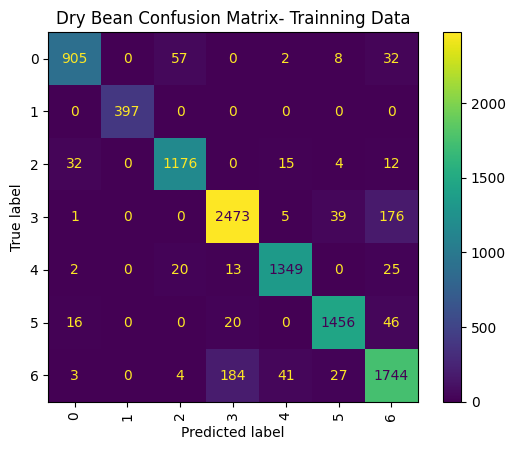

Val F1_Score:  0.9132841328413284


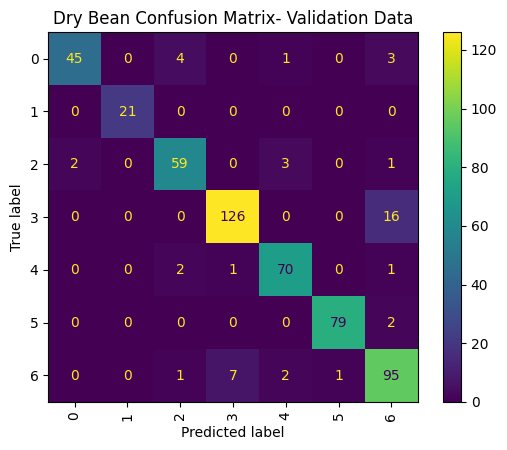

In [134]:
import statsmodels.api as sm
model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
result = model_logistic.fit(X_train, y_train)

# Step 4: Evaluate the model
print("Train F1_Score: ", metrics.f1_score(y_train, model_logistic.predict(X_train), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_logistic, X_train, y_train)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix- Trainning Data')
plt.show()  

print("Val F1_Score: ", metrics.f1_score(y_val, model_logistic.predict(X_val), average='micro'))

# Step 5: Display the results in the confusion matrix
plot_confusion_matrix(model_logistic, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix- Validation Data')
plt.show()

# Decision Trees

Train F1_Score: 1.0
Val F1_Score: 0.9298892988929889


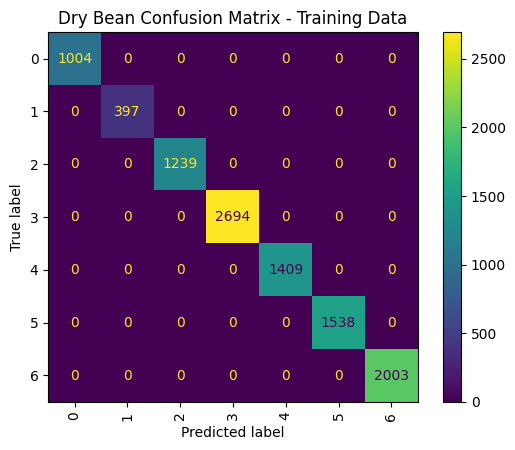

Val F1_Score: 0.8874538745387455


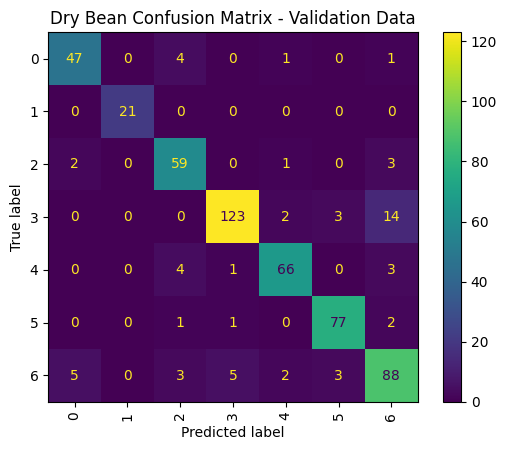

In [135]:
# Create a decision tree classifier
classifier = DecisionTreeClassifier()

classifier

# Train the decision tree classifier
classifier.fit(X_train, y_train)

# Step 4: Evaluate the model
train_f1_score = f1_score(y_train, classifier.predict(X_train), average='micro')

print("Train F1_Score:", train_f1_score)
print("Val F1_Score:", val_f1_score)

# Displaying Results in Confusion Matrix
plot_confusion_matrix(classifier, X_train, y_train)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix - Training Data')
plt.show()

val_f1_score = f1_score(y_val, classifier.predict(X_val), average='micro')
print("Val F1_Score:", val_f1_score)
# Step 5: Display the results in the confusion matrix
plot_confusion_matrix(classifier, X_val, y_val)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix - Validation Data')
plt.show()



# Random Forest

Train F1_Score: 1.0


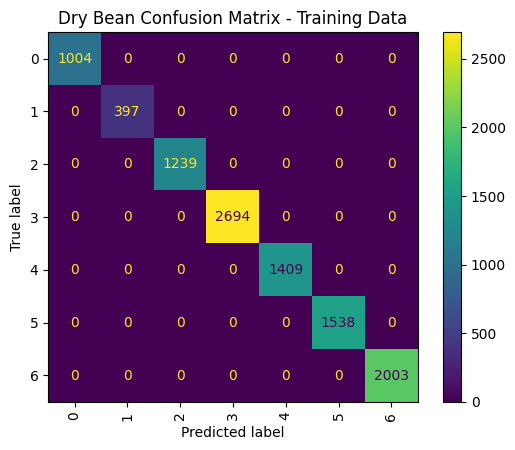

Val F1_Score: 0.933579335793358


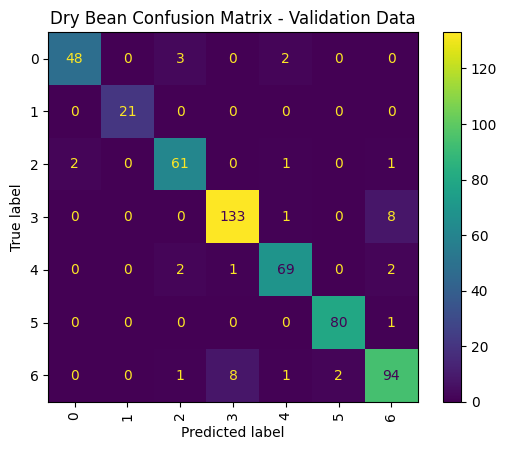

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Train the Random Forest classifier
classifier.fit(X_train, y_train)

# Step 4: Evaluate the model
train_f1_score = f1_score(y_train, classifier.predict(X_train), average='micro')

print("Train F1_Score:", train_f1_score)


# Displaying Results in Confusion Matrix
plot_confusion_matrix(classifier, X_train, y_train)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix - Training Data')
plt.show()

val_f1_score = f1_score(y_val, classifier.predict(X_val), average='micro')
print("Val F1_Score:", val_f1_score)
# Step 5: Display the results in the confusion matrix
plot_confusion_matrix(classifier, X_val, y_val)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix - Validation Data')
plt.show()


# MLPClassifier

Train F1_Score:  0.9421431349669389


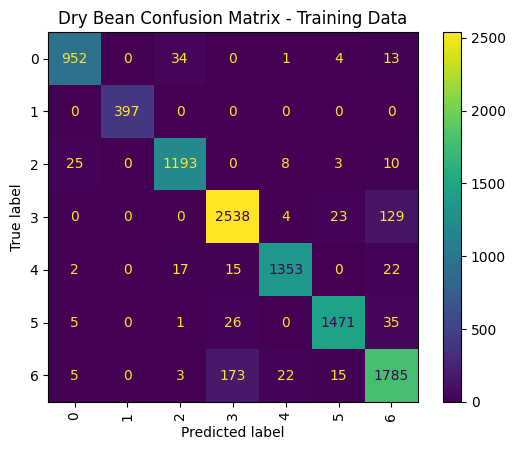

Val F1_Score:  0.9391143911439115


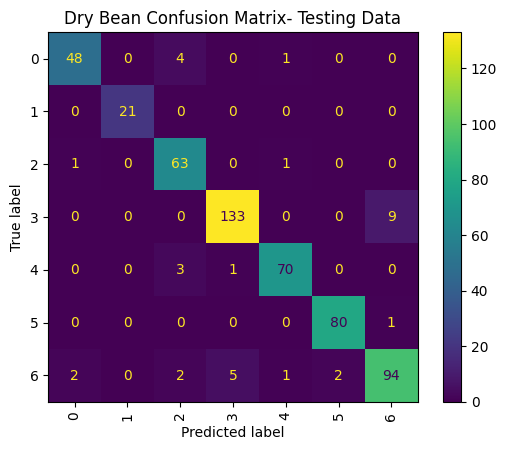

In [137]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)

model_mlp.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_mlp.predict(X_train), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_train, y_train)   
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix - Training Data')
plt.show()  

print("Val F1_Score: ", metrics.f1_score(y_val, model_mlp.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix- Testing Data')
plt.show()  

# Boosted Tree 

Train F1_Score:  0.9614935822637106


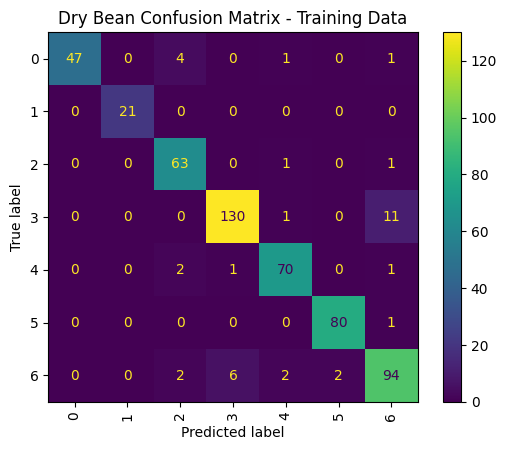

Val F1_Score:  0.9317343173431735


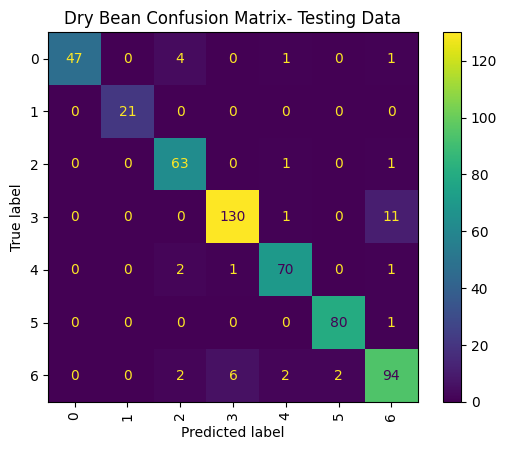

In [138]:
model_xgb= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=2,
                             max_depth=4, learning_rate=0.15, gamma=0.22, colsample_bytree=0.5)

model_xgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_xgb.predict(X_train), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_xgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix - Training Data')
plt.show()  

print("Val F1_Score: ", metrics.f1_score(y_val, model_xgb.predict(X_val), average='micro'))
# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_xgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix- Testing Data')
plt.show() 

In [140]:
model_cb= cb.CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=4, iterations=600, depth= 6)

model_cb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_cb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_cb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_cb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

NameError: name 'cb' is not defined

Train F1_Score:  0.9491443018280824
Val F1_Score:  0.940959409594096


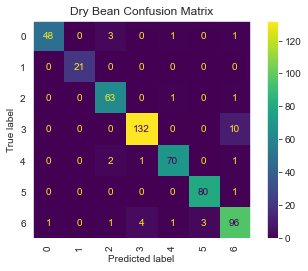

In [27]:
model_lgb = lgb.LGBMClassifier(random_state=42,silent=True,subsample=0.8, reg_lambda=0.1,reg_alpha=1, num_leaves=5, 
                             n_estimators=100, min_child_samples=5, max_depth=5, learning_rate=0.12, 
                             colsample_bytree=0.5, boosting_type='goss', metric='multi_error', num_class=7)

model_lgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_lgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_lgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9418514196810579
Val F1_Score:  0.933579335793358


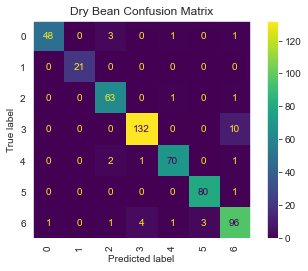

In [28]:
model_svc = SVC(probability=True, kernel='rbf', C=25)

model_svc.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

0:	learn: 1.5747513	total: 17.1ms	remaining: 10.3s
1:	learn: 1.3354895	total: 31.8ms	remaining: 9.5s
2:	learn: 1.1746783	total: 46.4ms	remaining: 9.23s
3:	learn: 1.0444295	total: 61.5ms	remaining: 9.16s
4:	learn: 0.9482163	total: 76.1ms	remaining: 9.05s
5:	learn: 0.8681159	total: 90.6ms	remaining: 8.97s
6:	learn: 0.7948639	total: 104ms	remaining: 8.85s
7:	learn: 0.7325627	total: 121ms	remaining: 8.99s
8:	learn: 0.6791659	total: 138ms	remaining: 9.05s
9:	learn: 0.6351819	total: 154ms	remaining: 9.09s
10:	learn: 0.5952145	total: 170ms	remaining: 9.12s
11:	learn: 0.5609732	total: 187ms	remaining: 9.18s
12:	learn: 0.5314357	total: 203ms	remaining: 9.16s
13:	learn: 0.5052377	total: 220ms	remaining: 9.21s
14:	learn: 0.4810385	total: 237ms	remaining: 9.24s
15:	learn: 0.4587019	total: 251ms	remaining: 9.18s
16:	learn: 0.4393688	total: 266ms	remaining: 9.12s
17:	learn: 0.4214110	total: 280ms	remaining: 9.06s
18:	learn: 0.4055666	total: 295ms	remaining: 9.01s
19:	learn: 0.3914296	total: 310ms	re

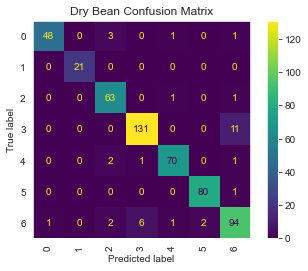

In [30]:
voting_model = VotingClassifier(estimators=[('xgb', model_xgb), ('lgb', model_lgb),('mlp', model_mlp),
                                            ('cb', model_cb)], voting='soft')

voting_model.fit(X_train, y_train)

print("F1_Score: ", metrics.f1_score(y_val, voting_model.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(voting_model, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

In [34]:
for clf in (model_svc, model_lgb, model_xgb, model_mlp, model_cb, voting_model):
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, metrics.f1_score(y_val, y_pred, average='micro'))

SVC 0.933579335793358
LGBMClassifier 0.940959409594096
XGBClassifier 0.9372693726937269
MLPClassifier 0.9391143911439115
CatBoostClassifier 0.940959409594096
VotingClassifier 0.9354243542435424


# Test

In [32]:
test_df = pd.read_csv('dataset/test_dry.csv')
X_test = test_df.drop(columns=['ID'])

X_test['Bounding_rectangular_area'] = X_test['Area']/X_test['Extent']


X_test_scaled = sc.transform(X_test[cols])
X_test[cols] = pd.DataFrame(X_test_scaled, index=X_test.index)


X_test = X_test.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                              'Perimeter','AspectRation'])

y_test_pred = voting_model.predict(X_test)

In [34]:
test_df['y'] = le.inverse_transform(y_test_pred)
#test_df[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)